## Programming Assignment 2: Classification Task and Performance Evaluation
### Name: Fru Nkimbeng Christian
### Banner ID: 916-463-968


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

### Converting the images to edge histograms

In [2]:
# Function to calculate edge histogram for an image
def calculate_edge_histogram(image_path):
    try:
        # Load the image and convert to grayscale
        image = Image.open(image_path).convert('L')
        
        # Apply edge detection filter
        edges = image.filter(ImageFilter.FIND_EDGES)
        
        # Calculate histogram (256 bins for grayscale)
        histogram, _ = np.histogram(edges, bins=256, range=(0, 255))
        
        # Normalize histogram
        histogram = histogram / histogram.sum()
        
        return histogram
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Define the path to images folder
image_folder = Path('/Users/apple/Downloads/data_mining_2/Images')

# Filter image paths (exclude hidden files)
image_paths = [p for p in image_folder.rglob('*') if p.suffix in {'.jpg', '.jpeg', '.png'} and '._' not in p.stem]

# Process images and create dataset
edge_histograms = []
image_labels = []

# Assume class labels are derived from folder names (e.g., parent folder as label)
for image_path in image_paths:
    label = image_path.parent.name  # Folder name as label
    histogram = calculate_edge_histogram(image_path)
    if histogram is not None:
        edge_histograms.append(histogram)
        image_labels.append(label)

# Convert lists to numpy arrays
X = np.array(edge_histograms)
y = np.array(image_labels)


### Spliting the dataset into a training set and a test set (80/20 split)

In [3]:
from sklearn.model_selection import train_test_split

# Split the dataset with an 80/20 train-test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Performing the standardization on the training dataset

In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### standardization on the test dataset using the means and variances you obtained

In [5]:
# Transform the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

## Q6

In [6]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt

In [7]:
# Initialize classifiers with specified parameters and increased max_iter for MLPClassifier
gnb = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500, random_state=42)  # Increased max_iter
rf = RandomForestClassifier(random_state=42)

In [8]:
# List of classifiers for iteration
classifiers = {
    'GaussianNB': gnb,
    'MLPClassifier': mlp,
    'RandomForestClassifier': rf
}

<Figure size 800x600 with 0 Axes>

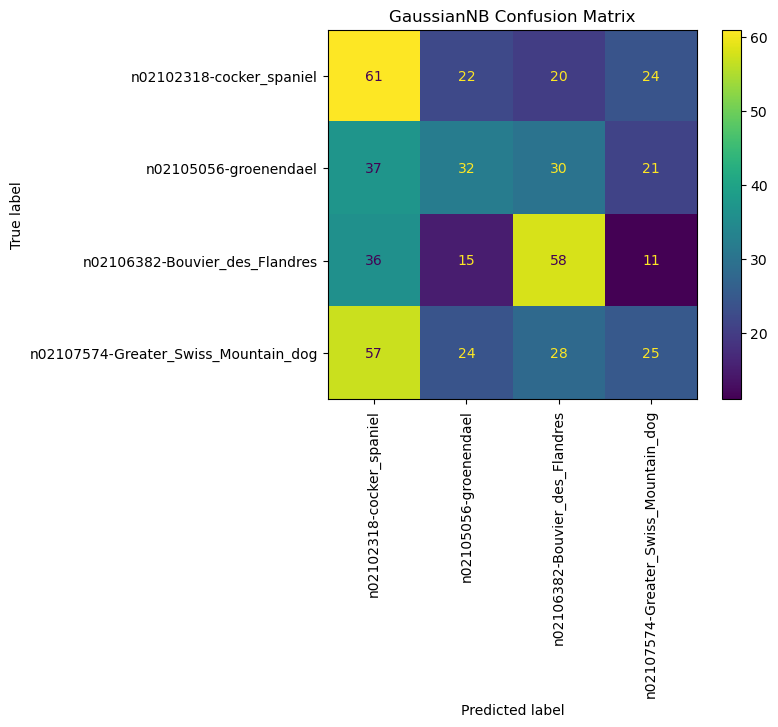

<Figure size 800x600 with 0 Axes>

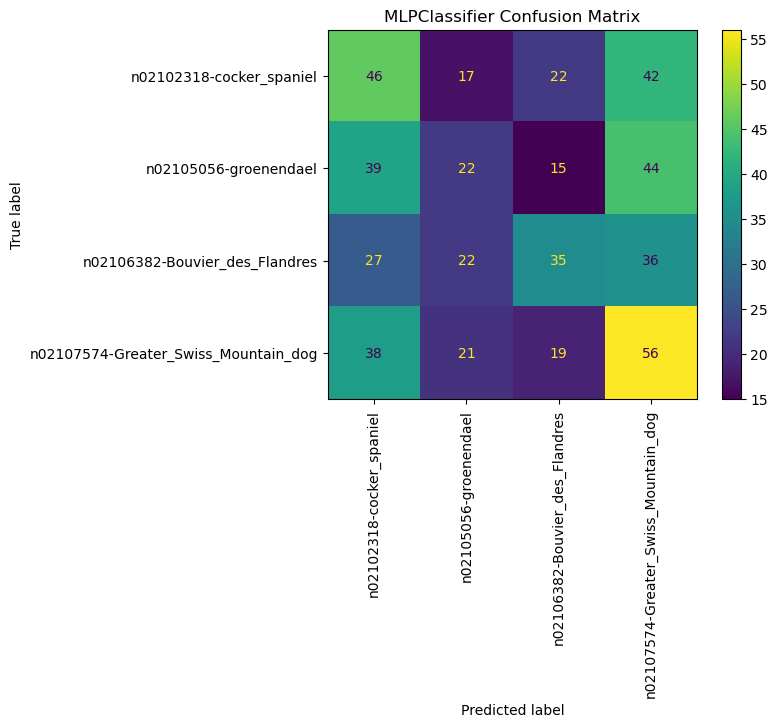

<Figure size 800x600 with 0 Axes>

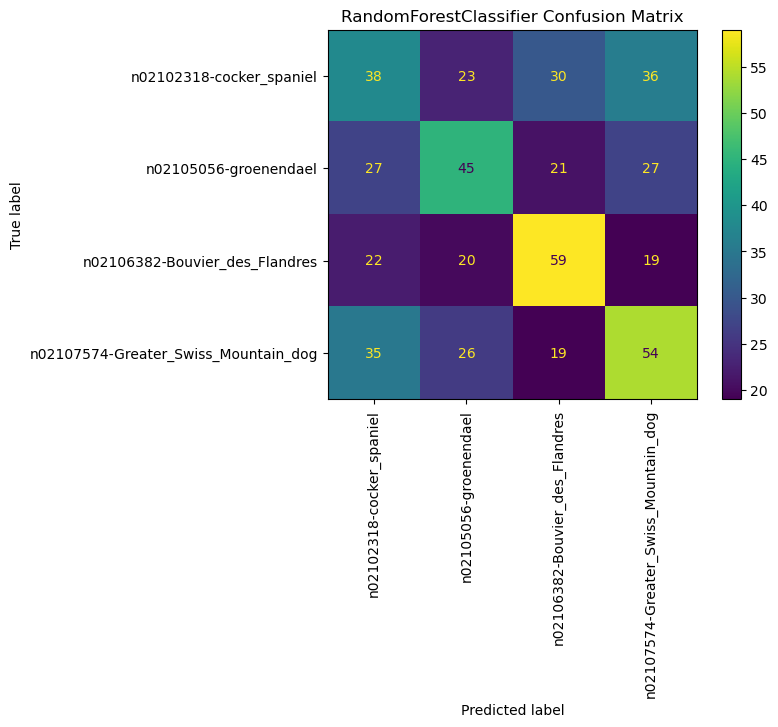

In [9]:
# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Unique labels in y_train
unique_labels = np.unique(y_train)

# Plot each confusion matrix in its own figure
for name, clf in classifiers.items():
    # Perform cross-validated predictions
    y_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=cv)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_train, y_pred, labels=unique_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))  # Adjust size for clarity
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap='viridis')
    plt.title(f"{name} Confusion Matrix")
    plt.xticks(rotation=90)
    plt.show()

## Q6 i

##### The Random Forest Classifier appears to be the best-performing method here because
##### It has consistently higher values on the diagonal across all classes, indicating accurate predictions.
##### It has relatively fewer off-diagonal values, suggesting fewer misclassifications compared to the other classifiers.

## Q6 ii

In [10]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.neural_network")
from sklearn.model_selection import cross_val_score

# Initialize classifiers with specified parameters
gnb = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500, random_state=42)
rf = RandomForestClassifier(random_state=42)

# List of classifiers for iteration
classifiers = {
    'GaussianNB': gnb,
    'MLPClassifier': mlp,
    'RandomForestClassifier': rf
}

# Dictionary to store mean validation accuracies
mean_accuracies = {}

# Perform 5-fold cross-validation and calculate mean accuracy for each classifier
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    mean_accuracies[name] = mean_accuracy
    print(f"{name} Mean Validation Accuracy: {mean_accuracy:.4f}")

# Find the classifier with the highest mean validation accuracy
best_method = max(mean_accuracies, key=mean_accuracies.get)
print(f"\nThe best method based on mean validation accuracy is: {best_method} with an accuracy of {mean_accuracies[best_method]:.4f}")

GaussianNB Mean Validation Accuracy: 0.3254
MLPClassifier Mean Validation Accuracy: 0.3214
RandomForestClassifier Mean Validation Accuracy: 0.3753

The best method based on mean validation accuracy is: RandomForestClassifier with an accuracy of 0.3753


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers with specified parameters
gnb = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Dictionary to store test accuracies
test_accuracies = {}

# Fit each classifier, make predictions on the test set, and calculate accuracy
for name, clf in zip(['GaussianNB', 'MLPClassifier', 'RandomForestClassifier'], [gnb, mlp, rf]):
    clf.fit(X_train_scaled, y_train)  # Train on the training set
    y_pred = clf.predict(X_test_scaled)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")

# Identify the classifier with the highest test accuracy
best_method = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best method based on test accuracy is: {best_method} with an accuracy of {test_accuracies[best_method]:.4f}")

GaussianNB Test Accuracy: 0.3968
MLPClassifier Test Accuracy: 0.5000
RandomForestClassifier Test Accuracy: 0.5159

The best method based on test accuracy is: RandomForestClassifier with an accuracy of 0.5159


In [12]:
from sklearn.metrics import f1_score

# Dictionary to store F-measures (F1-scores)
f1_scores = {}

# Fit each classifier, make predictions on the test set, and calculate F1 score
for name, clf in zip(['GaussianNB', 'MLPClassifier', 'RandomForestClassifier'], [gnb, mlp, rf]):
    clf.fit(X_train_scaled, y_train)  # Train on the training set
    y_pred = clf.predict(X_test_scaled)  # Predict on the test set
    f1 = f1_score(y_test, y_pred, average='macro')  # Calculate F1 score
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

# Identify the classifier with the highest F1 score
best_method = max(f1_scores, key=f1_scores.get)
print(f"\nThe best method based on F1 score is: {best_method} with an F1 score of {f1_scores[best_method]:.4f}")


GaussianNB F1 Score: 0.3837
MLPClassifier F1 Score: 0.4962
RandomForestClassifier F1 Score: 0.5120

The best method based on F1 score is: RandomForestClassifier with an F1 score of 0.5120


## Q7 Model Selection

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Filter the dataset to include only two classes
class_1, class_2 = np.unique(y_train)[:2]  # Select the first two unique classes
indices = np.isin(y_train, [class_1, class_2])
X_train_two_classes = X_train_scaled[indices]
y_train_two_classes = y_train[indices]

# Define parameter values for C
C_values = [0.1, 1, 10, 100]

# Dictionaries to store results for each cross-validation type
standard_cv_results = {}
stratified_cv_results = {}

# Perform standard and stratified 5-fold cross-validation for each value of C
for C in C_values:
    # Initialize LinearSVC with the current C value and increased max_iter
    svc = LinearSVC(C=C, max_iter=5000, random_state=42)
    
    # Standard 5-Fold Cross-Validation
    standard_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    standard_scores = cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=standard_kfold, scoring='accuracy')
    standard_cv_results[C] = standard_scores.mean()
    
    # Stratified 5-Fold Cross-Validation
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    stratified_scores = cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=stratified_kfold, scoring='accuracy')
    stratified_cv_results[C] = stratified_scores.mean()

# Display results
print("Standard 5-Fold Cross-Validation Results:")
for C, score in standard_cv_results.items():
    print(f"C={C}: Mean Accuracy = {score:.4f}")

print("\nStratified 5-Fold Cross-Validation Results:")
for C, score in stratified_cv_results.items():
    print(f"C={C}: Mean Accuracy = {score:.4f}")


Standard 5-Fold Cross-Validation Results:
C=0.1: Mean Accuracy = 0.6031
C=1: Mean Accuracy = 0.5709
C=10: Mean Accuracy = 0.5589
C=100: Mean Accuracy = 0.5509

Stratified 5-Fold Cross-Validation Results:
C=0.1: Mean Accuracy = 0.6030
C=1: Mean Accuracy = 0.5264
C=10: Mean Accuracy = 0.5102
C=100: Mean Accuracy = 0.5061


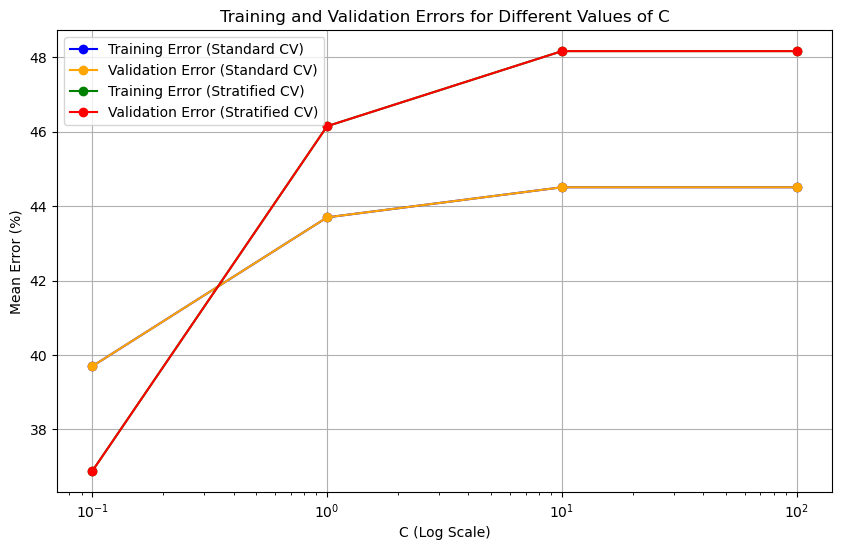

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Define the values of C to evaluate
C_values = [0.1, 1, 10, 100]

# Lists to store mean errors for each configuration
training_errors_standard = []
validation_errors_standard = []
training_errors_stratified = []
validation_errors_stratified = []

# Define standard and stratified cross-validation
standard_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each value of C and perform cross-validation
for C in C_values:
    svc = SVC(kernel='linear', C=C, random_state=42)
    
    # Calculate training and validation errors for standard cross-validation
    train_error_std = 1 - cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=standard_kfold).mean()
    val_error_std = 1 - cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=standard_kfold).mean()
    training_errors_standard.append(train_error_std * 100)
    validation_errors_standard.append(val_error_std * 100)

    # Calculate training and validation errors for stratified cross-validation
    train_error_strat = 1 - cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=stratified_kfold).mean()
    val_error_strat = 1 - cross_val_score(svc, X_train_two_classes, y_train_two_classes, cv=stratified_kfold).mean()
    training_errors_stratified.append(train_error_strat * 100)
    validation_errors_stratified.append(val_error_strat * 100)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, training_errors_standard, label="Training Error (Standard CV)", marker='o', color='blue')
plt.plot(C_values, validation_errors_standard, label="Validation Error (Standard CV)", marker='o', color='orange')
plt.plot(C_values, training_errors_stratified, label="Training Error (Stratified CV)", marker='o', color='green')
plt.plot(C_values, validation_errors_stratified, label="Validation Error (Stratified CV)", marker='o', color='red')

# Configure plot appearance
plt.xscale('log')
plt.xlabel("C (Log Scale)")
plt.ylabel("Mean Error (%)")
plt.title("Training and Validation Errors for Different Values of C")
plt.legend()
plt.grid(True)
plt.show()

## Comments on graph; 
#### (1) From the graph, the higher C values increase model complexity, but they don’t improve validation performance, indicating diminishing returns. The best C values, with the lowest validation error, are 0.1 or 1, making these optimal choices as they balance model simplicity and generalization effectively.

#### (2) when/whether there is overfitting/underfitting: There is underfitting at low C values as both training and validation errors are relatively high. As C increases, the model complexity grows, but we don't see a significant drop in validation error, indicating no clear overfitting. Thus, a moderate balances the model without overfitting.

In [15]:
from sklearn.metrics import accuracy_score

# Find the best C value with the lowest validation error from stratified cross-validation
best_C = C_values[np.argmin(validation_errors_stratified)]
print(f"Best C value based on stratified 5-fold validation error: {best_C}")

# Initialize SVC with the best C value
best_svc = SVC(kernel='linear', C=best_C, random_state=42)

# Train on the entire training set and evaluate on the test set
best_svc.fit(X_train_two_classes, y_train_two_classes)
y_test_pred = best_svc.predict(X_test_scaled)  # Use the standardized test set

# Calculate test error
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = (1 - test_accuracy) * 100
print(f"Test Error with best C ({best_C}): {test_error:.2f}%")


Best C value based on stratified 5-fold validation error: 0.1
Test Error with best C (0.1): 68.25%


### Refrences
#### 1) Scikit-Learn Documentation: URL: https://scikit-learn.org/stable/modules/cross_validation.html, Support Vector Classifier (SVC): URL: https://scikit-learn.org/stable/modules/svm.html, Evaluation Metrics: URL: https://scikit-learn.org/stable/modules/model_evaluation.html
#### 2) Matplotlib: used for plotting error curves and confusion matrices; URL: https://matplotlib.org/stable/contents.html
#### 3) Handling Convergence Warnings; URL: https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use 